## **利用geopandas进行矢量数据快速读、写、及可视化.**

In [55]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
path_kunming = 'data/昆明市行政边界(poi86.com)/昆明市边界_wgs84.shp'
path_kunming_out_1 = 'data/Section_4/vector_out_1.shp'
path_kunming_out_2 = 'data/Section_4/vector_out_2.shp'



### 1. 读入矢量数据

In [20]:
kunming_gpd = gpd.read_file(path_kunming)
kunming_gpd.head(10)

,fid,name,site,geometry
0,1.0,昆明市,www.poi86.com,"POLYGON ((102.23502 26.18850, 102.23516 26.188..."
1,2.0,五华区,www.poi86.com,"MULTIPOLYGON (((102.69718 25.38032, 102.69726 ..."
2,3.0,盘龙区,www.poi86.com,"POLYGON ((102.95160 25.25580, 102.94017 25.257..."
3,4.0,官渡区,www.poi86.com,"POLYGON ((102.71572 25.03637, 102.71646 25.036..."
4,5.0,西山区,www.poi86.com,"MULTIPOLYGON (((102.55894 25.16249, 102.58745 ..."
5,6.0,东川区,www.poi86.com,"POLYGON ((102.80190 26.30640, 102.80388 26.306..."
6,7.0,呈贡区,www.poi86.com,"POLYGON ((102.85182 24.70104, 102.85030 24.701..."
7,8.0,晋宁区,www.poi86.com,"POLYGON ((102.73831 24.82029, 102.73989 24.818..."
8,9.0,富民县,www.poi86.com,"MULTIPOLYGON (((102.63295 25.37092, 102.63640 ..."
9,10.0,宜良县,www.poi86.com,"POLYGON ((103.27194 25.26078, 103.27147 25.258..."


### 2. 可视化矢量数据

<Axes: >

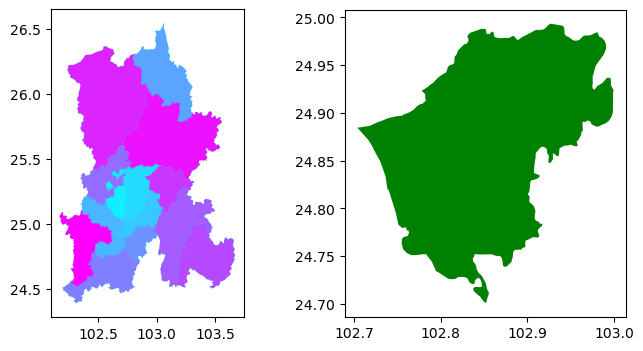

In [47]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
kunming_gpd.plot(ax=ax[0], column='fid', cmap='cool')
kunming_chenggong_gpd = kunming_gpd.iloc[6:7]
kunming_chenggong_gpd.plot(ax=ax[1], color='green')


#### **3. 写出矢量文件**

#### 3.1 写出只含有特定字段(name)的矢量文件

In [53]:
kunming_out_1 = kunming_gpd[['name', 'geometry']]
kunming_out_1.head()


,name,geometry
0,昆明市,"POLYGON ((102.23502 26.18850, 102.23516 26.188..."
1,五华区,"MULTIPOLYGON (((102.69718 25.38032, 102.69726 ..."
2,盘龙区,"POLYGON ((102.95160 25.25580, 102.94017 25.257..."
3,官渡区,"POLYGON ((102.71572 25.03637, 102.71646 25.036..."
4,西山区,"MULTIPOLYGON (((102.55894 25.16249, 102.58745 ..."


In [54]:
kunming_out_1.to_file(path_kunming_out_1)


#### 3.1 写出只含有特定特征（呈贡区）矢量文件


In [75]:
id_sel = np.where(kunming_gpd['name']=='呈贡区')[0]
id_sel
kunming_out_2 = kunming_gpd.iloc[id_sel]


,fid,name,site,geometry
6,7.0,呈贡区,www.poi86.com,"POLYGON ((102.85182 24.70104, 102.85030 24.701..."


In [76]:
kunming_out_2.to_file(path_kunming_out_2)



### 验证写出结果

In [84]:
kunming_out_2 = gpd.read_file(path_kunming_out_2)
kunming_out_2


,fid,name,site,geometry
0,7.0,???,www.poi86.com,"POLYGON ((102.85182 24.70104, 102.85030 24.701..."
